# 1. Collecting data

### What subject is your data about? What is the source of your data?

- Dữ liệu sử dụng trong đồ án này là về điểm số (Toán, viết, đọc) của 1000 học sinh Trung học Phổ thông ở Mỹ.
- Dữ liệu được lấy trên Kaggle.com ở <a href="https://www.kaggle.com/spscientist/students-performance-in-exams">link</a>

### Do authors of this data allow you to use like this? You can check the data license

- License trong phần này là unknown, nghĩa là chưa có bản quyền. Việc chúng ta tải về và sử dụng là hợp pháp.
- Hơn nữa, trong đồ án này, dataset này hoàn toàn được sử dụng cho mục đích học tập nên sẽ không vi phạm bản quyền.

### How did authors collect data?

Tác giả, Jakki Seshapanpu, không nói rõ là thu thập dữ liệu từ các trường khác nhau trong các bang khác nhau ở nước Mỹ, mà chỉ nói thu thập từ các học sinh THPT và các thông đinh về sinh viên được bảo mật.

Các thông tin về học sinh mà tác giả thu thâp gồm: giới tính, dân tộc (tác giả cũng giấu luôn cả tên dân tộc), trình độ học vấn của cha mẹ, phần ăn buổi trưa, đã hoàn thành khóa học luyện thi hay chưa, và số điểm toán, đọc, viết.

# 2. Exploring data

### Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Đọc dữ liệu từ csv vào dataframe

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dữ liệu gồm bao nhiêu dòng và bao nhiêu cột?

In [4]:
df.shape

(1000, 8)

Dữ liệu gồm 1000 dòng (tương đương với 1000 học sinh) và 8 cột (8 trường dữ liệu)

### Mỗi dòng trong tập dữ liệu có ý nghĩa là gì? Có các dòng nào có ý nghĩa khác các dòng còn lại không?

Theo quan sát sơ bộ thì mỗi dòng dữ liệu thể hiện thông tin của một học sinh và có vẻ như không có dòng nào mang ý nghĩa khác các dòng còn lại.

### Dữ liệu có dòng nào bị lập không?

In [8]:
False if df.duplicated().sum() == 0 else True

False

Dữ liệu không có các dòng trùng nhau.

### Mỗi cột có ý nghĩa gì?

Có tất cả 8 trường dữ liệu:
- **gender:** Giới tính của học sinh.
- **race/ethnicity:** Học sinh thuộc chủng tộc/dân tộc nào.
- **parental level of education:** Trình độ học vấn của cha mẹ học sinh đó.
- **lunch:** Tiêu chuẩn suất ăn trưa của học sinh.
- **test preparation course:** Học sinh đã hoàn thành khóa học ôn tập hay chưa?
- **math score:** Điểm toán.
- **reading score:** Điểm đọc.
- **writing score:** Điểm viết.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Có 4 cột có kiểu dữ liệu `object` là "gender", "race/ethnicity", "parental level of education" và "lunch". Trong Pandas, kiểu dữ liệu `object` thường sẽ là kiểu dữ liệu `str`, nhưng ngoài ra, kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). 3 cột điểm có kiểu dữ liệu mong muốn, đó là `int64`.

Kiểu dữ liệu thật lưu bên dưới của 4 cột có kiểu dữ liệu `object` trên là:

In [14]:
type(df.loc[0, 'gender'])

str

In [15]:
type(df.loc[0, 'race/ethnicity'])

str

In [16]:
type(df.loc[0, 'parental level of education'])

str

In [17]:
type(df.loc[0, 'lunch'])

str

Như vậy, nằm trong dự đoán, 4 cột này đều có kiểu dữ liệu thật là `str`. Các kiểu dữ liệu của mỗi cột đã hợp lý và không cần phải tiền xử lý nữa, việc còn lại của chúng ta là bắt tay vào việc nghiên cứu phân phối của từng trường dữ liệu một.

### Khám phá dữ liệu

#### Với mỗi cột dữ liệu dạng numeric thì các giá trị được phân bố như thế nào?

Theo trực quan ở trên, thì ta chỉ có 3 cột điểm là thuộc dạng numeric, còn lại đều là dạng catogerical. Phân bố của 3 cột điểm sẽ như thế nào?

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Cột min của môn Toán là thấp nhất, trong khi đó thì môn đọc có giá trị min cao nhất (có thể vì môn này là dễ nhất). Còn các giá trị khác không có gì bất thường.

Trong các cột dữ liệu dạng numeric, liệu có giá trị nào bị thiếu hay không?

In [21]:
def missing_ratio(s):
    return s.isna().mean() * 100
df[['math score',  'reading score', 'writing score']].agg([missing_ratio])

,math score,reading score,writing score
missing_ratio,0.0,0.0,0.0


Không có giá trị nào bị thiếu trong 3 cột này. Việc này có thể những đọc giả tinh ý thì cũng có thể đoán ra được 3 cột này "rất khó" để bị thiếu, vì nó là cột mà ta muốn đào sâu sau này nhất.

#### Với mỗi cột dữ liệu dạng categorical thì các giá trị được phân bố như thế nào?

Các cột dạng categorical sẽ là "gender", "race/ethnicity", "parental level of education" và "lunch".

In [22]:
df.describe(include=object).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


Có thể thấy cột "gender" có số lượng mỗi bên đồng đều nhất, số lượng chênh lệch không nhiều. Các cột còn lại thì bị lệch một cách đáng kể mà mắt thường có thể nhận thấy.

Có bao nhiêu học sinh trong mỗi group của trường giá trị race/ethnicity?

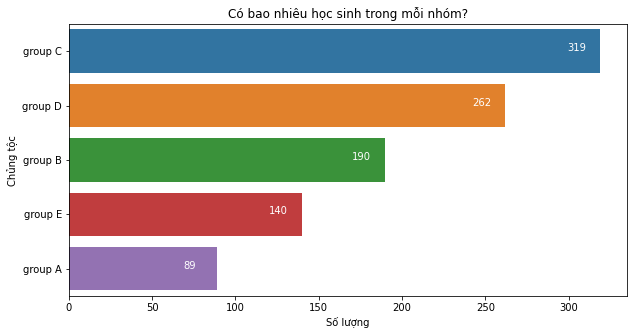

In [33]:
race_counts = df['race/ethnicity'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(x=race_counts.values, y=race_counts.index, orient='h')
ax.set_title("Có bao nhiêu học sinh trong mỗi nhóm?")
ax.set_xlabel(xlabel="Số lượng")
ax.set_ylabel(ylabel="Chủng tộc")

for index, value in enumerate(race_counts): 
    plt.annotate(value, xy=(value-20, index), color='white')

Các sinh viên chủ yếu thuộc nhóm C và nhóm D là nhiều nhất.

Trình độ học vấn của phụ huynh phân bố ra sao?

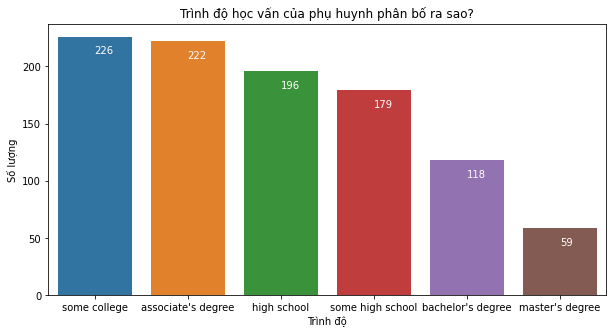

In [36]:
parental_level_counts = df['parental level of education'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(x=parental_level_counts.index, y=parental_level_counts.values)
ax.set_title("Trình độ học vấn của phụ huynh phân bố ra sao?")
ax.set_xlabel(xlabel="Trình độ")
ax.set_ylabel(ylabel="Số lượng")

for index, value in enumerate(parental_level_counts): 
    plt.annotate(value, xy=(index, value-15), color='white') 

Đa số các bậc phụ huynh đều đã có bằng đại học hoặc bằng cao đẳng.

Kết hợp cả hai đồ thị trên, ta có thể xem phân phối được loại bằng cấp nào của phụ huynh là phổ biến nhất trong các chủng tộc/dân tộc. 

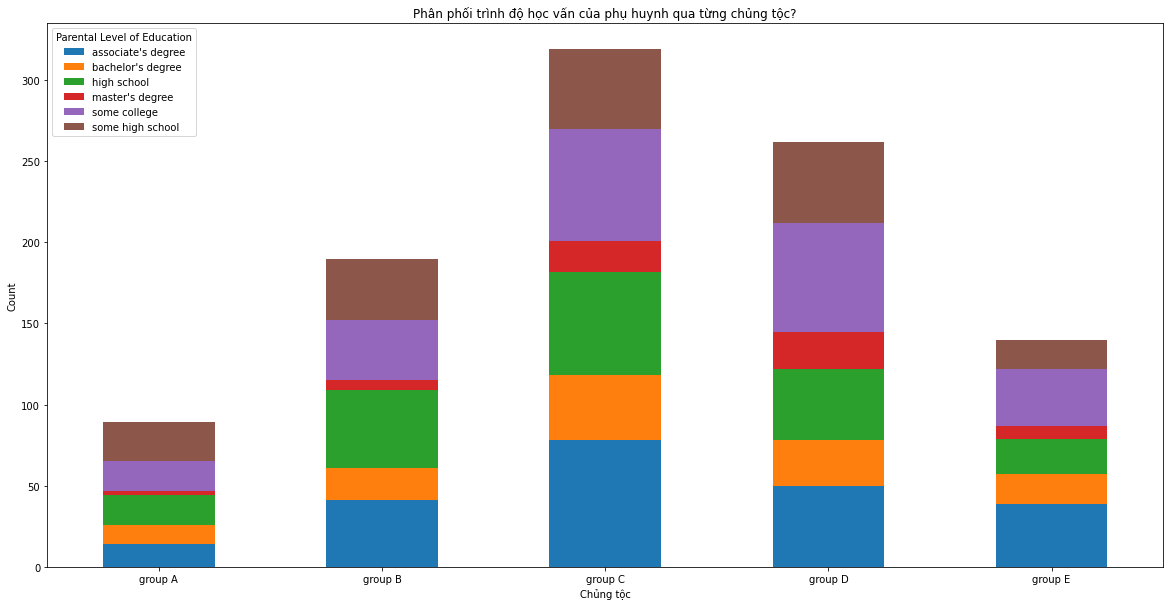

In [40]:
ax = pd.crosstab(df["race/ethnicity"], [df["parental level of education"]]).plot.bar(stacked=True, figsize=(20,10))
ax.set_title("Phân phối trình độ học vấn của phụ huynh qua từng chủng tộc?")
ax.set_xlabel(xlabel="Chủng tộc")
ax.set_ylabel(ylabel="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(loc="upper left", title="Parental Level of Education");

Số lượng phụ huynh với bằng đại học vẫn nhiều nhất trong tất cả các nhóm chủng tộc.

Có cột nào bị thiếu giá trị hay không?

In [41]:
df[["gender", "race/ethnicity", "parental level of education", "lunch"]].isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
dtype: int64

Tới đây, có thể thấy tác giả thu thập dữ liệu rất tốt, không một cột nào bị thiếu dữ liệu cả.

### Làm rõ hơn về ý nghĩa của cột dữ liệu dạng categorical

- **lunch:** cột này có 2 giá trị là "standard" hoặc "free/reduced". "Standard" có nghĩa là tiêu chuẩn, tức là một bữa ăn đạt tiêu chuẩn (theo một chuẩn đánh giá của Mỹ, <a href="https://schoolnutrition.org/AboutSchoolMeals/SchoolMealTrendsStats/">xem ở đây để thêm chi tiết</a>). Còn đối với bữa ăn "free/reduced" thì học sinh được hỗ trợ miễn phí hoặc giảm một số tiền nhất định. Về chất lượng thì bữa ăn giống nhau.
- **test preparation course:** có nghĩa là sinh viên đã hoàn thành khóa học ôn luyện trước khi làm bài kiểm tra hay chưa (giống như kiểu học thêm ở Việt Nam), gồm 2 giá trị, đã hoàn thành (Completed) hoặc không (None).

# 3. Ask meaningful question

## 3.1. 

# 4. Preprocess and analyze data to answer questions

# 5. Reflection

# 6. Reference